## Final Project Submission

Please fill out:
* Student name: `SUSAN MUNGAI`
* Student pace: `Full time`
* Scheduled project review date/time: `01/10/2022`
* Instructor name: `William Okomba`
* Blog post URL:


# Business Understanding

## Business Understanding Overview
Our stakeholder is a commercial real estate agency and the business case is the need to provide advice to homeowners about how homes are priced based on various features eg. how home renovations might increase the estimated value of their homes, and by what amount.

## Objectives
The real estate company is trying to determine what types of houses to focus on selling. Statistical analysis will be done, specifically Linear Regression modeling, as this helps gain an in-depth understanding of a huge dataset by splitting the data into smaller samples inorder to make sense of it.


# DATA UNDERSTANDING

### Over view of the data set

In [1]:
# For data analysis  and data cleaning 
import pandas as pd
# For data analysis
import numpy as np 

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

### Loading the dataset

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [4]:
## Checking the information about the dataframe; How many columns and rows it has and the types of the data 
# also to see the presence of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#Checking the number of rows and coulmns of the dataframe
df.shape

(21597, 21)

In [6]:
# Checking the names of the columns in the dataset
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
# Some numerical analysis of the data 
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


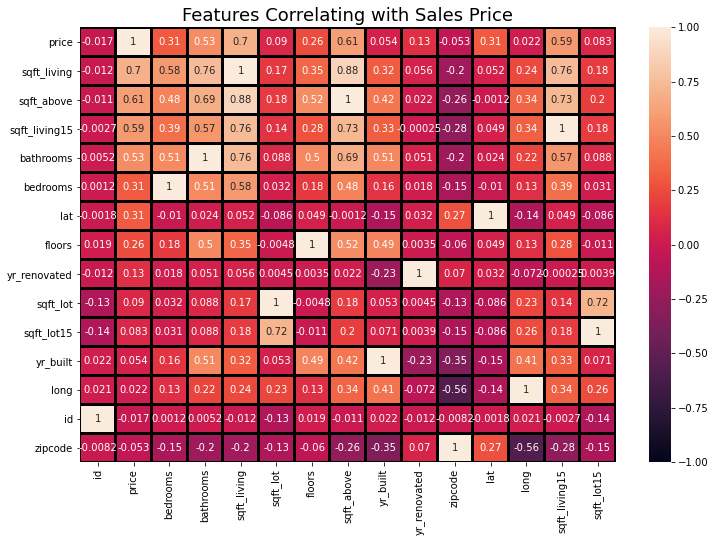

In [8]:
# Finding correlation between features using a heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    df.corr().sort_values(by='price',ascending=False),
    vmin=-1, vmax=1, annot=True,linewidths=2, linecolor='black')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18});

We have determined that the price column is the dependent variable as the other features determine a house's price

In [9]:
# Check the correlation of the price column with the other features
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

### Quality Data Report
1. The dataset has over 20,000 rows and 21 columns 


2. The columns contain information like the number of bathrooms,bedrooms, square-footage of the living space,the basement etc


3. The columns also have categorical data like the condition of the house, the grade and if the house has a waterfront or not 


4. From the business question, Price is our dependent variable and the other columns that have strong correlation to it include the square footage of the living space and and space above the basement

## DATA PREPARATION

This includes the actual preparation of the dataset to be analysed statistically, by cleaning the dataset, constructing new data from the already present data and formatting to make it suitable for regression modeling. 

## Data Cleaning 
This was done to ensure the Validity, Accuracy, Completeness, Consistency and Uniformity of the Data.
This includes checking for duplicated and missing values. Dealing with the null vlaues, and checking the actual columns for relevance, uniformity and readability, columns that will be found irrelevant ot the analysis will be dropped. 
Lastly, checking and dealing with the  outliers

In [10]:
# Checking for any duplicated values
df.duplicated().sum()

0

In [11]:
# Checking for null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
# Dropping the null values in the 'waterfront' and 'view' columns 
df.dropna(axis=0, subset = ['waterfront', 'view'], inplace = True)

In [13]:
# Dropping some unneccessary columns that have a weak correlation with the dependent variable
df.drop(['yr_renovated', 'sqft_living15', 'sqft_lot15', 'zipcode', 'lat', 'long'], axis=1, inplace=True)

In [14]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
dtype: int64

In [15]:
#Defining a fnction to check for outliers
def find_outliers(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
    return outliers

In [16]:
# Checking for outliers
outliers = find_outliers(df)
print("number of outliers: "+ str(len(outliers)))


number of outliers: 19164


### Exploratory Data Analysis

In [17]:
#For statistical analysis and modeling 
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

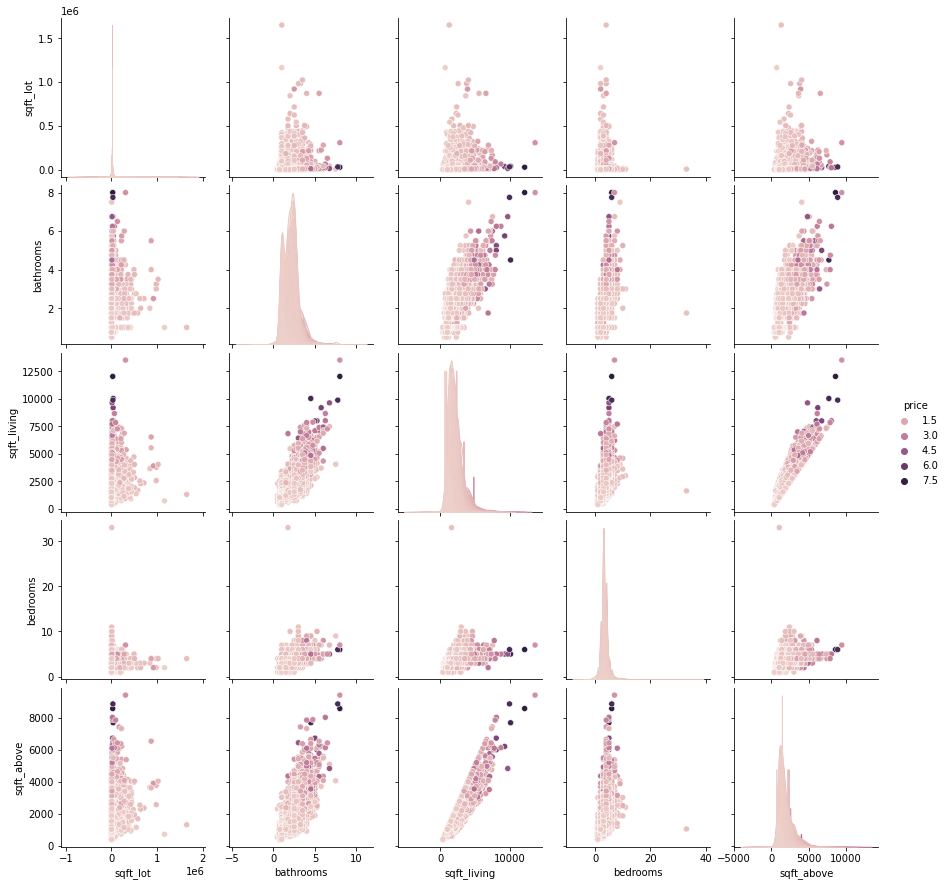

In [18]:
# Pairplot to see how the data is distributed and how they are related 
sns.pairplot(df[['sqft_lot','bathrooms','price','sqft_living','bedrooms', 'sqft_above', 'sqft_basement']], hue = 'price');

#### Exploring the price column 
Since we determined that price was our dependent variable then we can explore and withdraw more insights

In [19]:
df.price.describe()

count    1.916400e+04
mean     5.414490e+05
std      3.709009e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.439625e+05
max      7.700000e+06
Name: price, dtype: float64

In [20]:
df.corr()['price'].sort_values(ascending=False)

price          1.000000
sqft_living    0.704428
sqft_above     0.609611
bathrooms      0.526609
bedrooms       0.309057
floors         0.258797
sqft_lot       0.087430
yr_built       0.053433
id            -0.018107
Name: price, dtype: float64

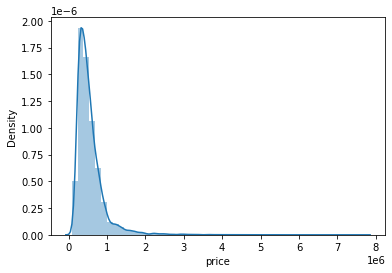

In [21]:
# Check the distribution of the price column 
sns.distplot(df['price']);

In [22]:
print("The skewness of the price column", df['price'].skew())
print("The kurtosis of the price column", df['price'].kurt())

The skewness of the price column 4.081094881163346
The kurtosis of the price column 35.301205336165545


In [23]:
find_outliers(df.price).count()

1047

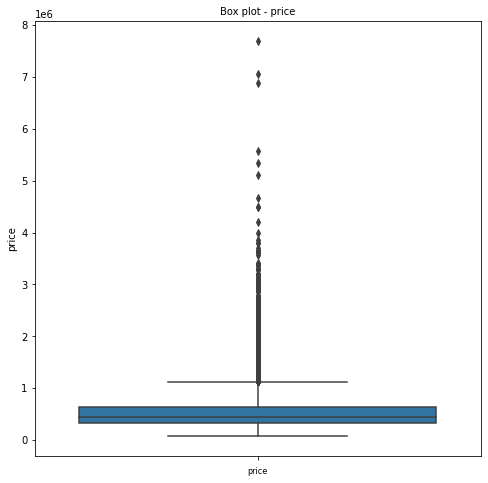

In [24]:
col_names = ['price']
fig, ax = plt.subplots(len(col_names), figsize= (8,8))
for i, col_val in enumerate(col_names):
    sns.boxplot(y = df[col_val], ax= ax)
    ax.set_title('Box plot - {}'.format(col_val), fontsize= 10)
    ax.set_xlabel(col_val, fontsize= 8)
plt.show()

##### Observations
1. The density plot above shows that the price column deviates from a normal distribution
2. The plot shows that the price column is Highly positively skewed. This means that more than half of the houses were sold for less than the average value leading to a long tail in the higher price ranges.
3. The plot shows that the price column displaces a Leptokurtic kurtosis as it has a longer tails and shows that the column has many outliers.


#### Dealing with Categorical Variables

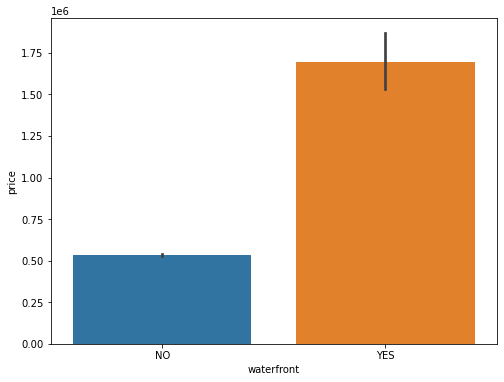

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x=df.waterfront, y=df.price, data=df);

## The houses either have a waterfront or don't.

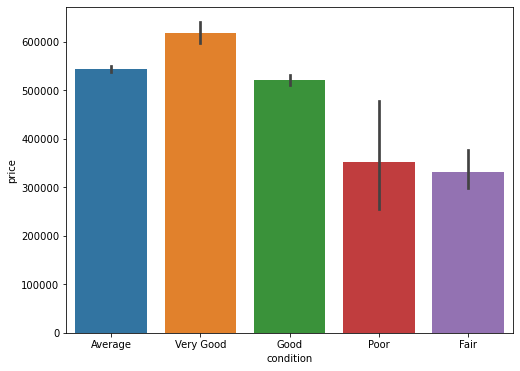

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=df, x=df.condition,y=df.price);

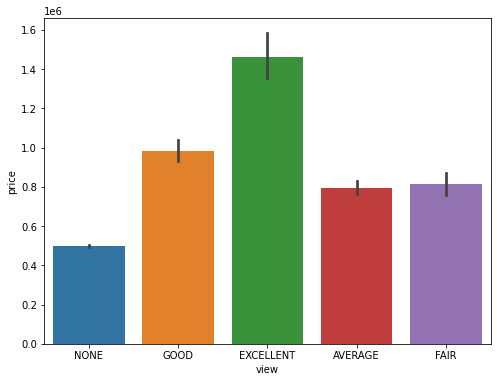

In [27]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=df, x=df.view,y=df.price);

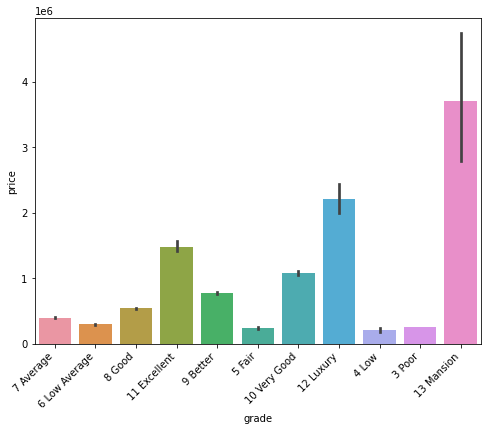

In [28]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=df, x=df.grade,y=df.price)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");

From the above plots, we see that the houses in good condition and that have an excellent view go for better prices. 

### Constructing Data

#### Dealing with categorical variables for regression analysis

Here we have to address the above categorical variables;in this case, the `Condition` column using the one-hot encoding `get_dummies` technique so as we build our linear regression models

In [31]:
df['condition'].value_counts()

Average      12437
Good          5041
Very Good     1509
Fair           152
Poor            25
Name: condition, dtype: int64

In [32]:
condition_df = df[['condition']].copy()
condition_df.sample(10, random_state=1)

,condition
10461,Average
17402,Very Good
5226,Average
802,Average
11849,Average
736,Good
16356,Average
21436,Average
20416,Average
14399,Very Good


In [33]:
# Converting the categorical variable into dummy/indicator variable.
condition_df = pd.get_dummies(condition_df, columns=["condition"])
condition_df

,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,1,0,0,0,0
5,1,0,0,0,0
...,...,...,...,...,...
21591,1,0,0,0,0
21592,1,0,0,0,0
21593,1,0,0,0,0
21594,1,0,0,0,0


In [34]:
pd.get_dummies(df, columns=["condition"], drop_first = True).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,condition_Fair,condition_Good,condition_Poor,condition_Very Good
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,7 Average,2170,400.0,1951,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,6 Low Average,770,0.0,1933,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,7 Average,1050,910.0,1965,0,0,0,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,8 Good,1680,0.0,1987,0,0,0,0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,11 Excellent,3890,1530.0,2001,0,0,0,0


## MODELING

### Simple Linear Regression Statsmodel
Create a regression model that uses ordinary least squares to asses the predicitve power of various features that will affect the price of the houses.
#### Our Baseline model
For the baseline model, it will include sqft_living as a predictor, since it has the the highest correlation and clearest linear relationship with price

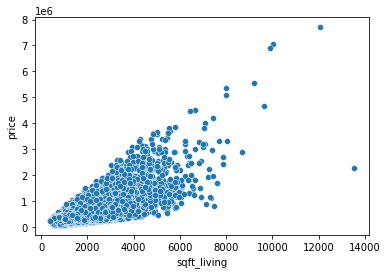

In [78]:
## Checking the correlation of the price and sqft_living using a scatter plot
sns.scatterplot(x=df.sqft_living, y=df.price);

From the above scatter plot, we see that the relationship is somewhat linear but a perfect linear relationship

In [79]:
# Start by specifying the x and y variables first
X = df[["sqft_living"]]
y = df["price"]

In [80]:
model = sm.OLS(endog=y, exog=sm.add_constant(X))
model

In [81]:

results= model.fit()
print(results.summary())
print(results.params)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.887e+04
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:56:44   Log-Likelihood:            -2.6638e+05
No. Observations:               19164   AIC:                         5.328e+05
Df Residuals:                   19162   BIC:                         5.328e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -4.86e+04   4697.110    -10.348      

In [116]:
print("MAE:", results.resid.abs().sum() / len(y))

print("RMSE:", ((results.resid ** 2).sum() / len(y)) ** 0.5)

MAE: 174810.80050643897
RMSE: 263249.39528290794


#### Interpretation of the Baseline Model
* The model is statistically significant as the F-statictiv p-value being below the alpha value of 0.05
* The `R-Squared`,the proportion of the variance of price that is explained by sqft_living is 49.6% which is low
* The low R-Squared shows the model is not going to be relevant.
* The Mean Absolute Error and the Root Squared Mean Error shows us by how much our model is off which is slightly over by 250,000 (precisely 263,249.4)
* The `price` of the house is prediced to increase by 283.40 for each square foot added.
* If the `sqft_living` was 0 we would predict a decrease 48604.077 in the price

Our Regression line is
$$ \hat{price} = -48604.077 + 283.40 sqftliving  $$





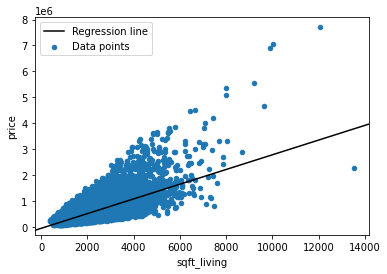

In [82]:
# Visualization of the model
fig, ax = plt.subplots()
df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results, label="Regression line", ax=ax, color="black")
ax.legend();

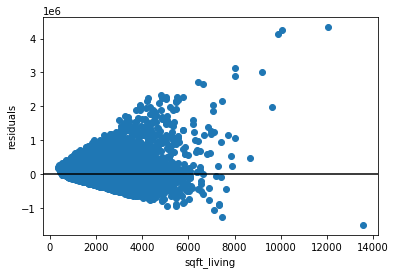

In [83]:
# Visusalizing the model residuals 
fig, ax = plt.subplots()

ax.scatter(df["sqft_living"], results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

The conditions of normality (of residuals) and homoscedasticity are clearly violated (The distribution of the residals)
`sqft_living` and `price` may have a better linear relationshIp if they were log-transformed.

### Log transformed model
The variable `sqft_living` has been log-transformed as we believe the previous relationship wasn't a perfect linear relationship 

In [84]:
X_sqft_living_log = X.copy()

X_sqft_living_log["log(sqft_living)"] = np.log(X_sqft_living_log["sqft_living"])


In [85]:
sqft_living_log_model = sm.OLS(y, sm.add_constant(X_sqft_living_log))
sqft_living_log_results = sqft_living_log_model.fit()
print(sqft_living_log_results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                 1.109e+04
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:56:59   Log-Likelihood:            -2.6558e+05
No. Observations:               19164   AIC:                         5.312e+05
Df Residuals:                   19161   BIC:                         5.312e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.818e+06    9.5e+04  

In [86]:
print("Baseline model R-squared:", results.rsquared)
print("Log model R-squared:", sqft_living_log_results.rsquared)

Baseline model R-squared: 0.4962192548976475
Log model R-squared: 0.5364044716872864


### Interpretations of the log transformed simple linear regression model
From the above results, we see the improved R-squared but unfortunately still low to deduce any viable conclusions. I will have to add more independent variables and do multiple linear regression. 

To start, we can add an independent variable, the one that had the second highest correlation with price `bathrooms`

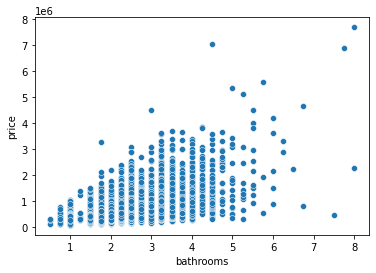

In [131]:
sns.scatterplot(x=df.bathrooms, y=df.price);

In [92]:

X_second = df[["sqft_living","bathrooms"]]

model_2 = sm.OLS(y, sm.add_constant(X_second))
results_2 = model_2.fit()

print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     9440.
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:17:32   Log-Likelihood:            -2.6637e+05
No. Observations:               19164   AIC:                         5.328e+05
Df Residuals:                   19161   BIC:                         5.328e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.329e+04   5592.320     -7.741      

In [98]:
print("Baseline model R-squared:", results.rsquared)
print("The second model R-squared:", results_2.rsquared)

Baseline model R-squared: 0.4962192548976475
The second model R-squared: 0.49629978143012643


### Interpretations of the second model
* We used another independent variable `bathrooms` and we can see that the accuracy of the model has not changed and deduce that we need to add more independent variables

## Multiple Linear Regression
 The simple linear regression model has a low R-Squared, we need to add more independent variables 
 #### The third model
 In this model, we add the next variables that also have almost linear realtionship with our target variable `price`, these include the `sqft_above`, `bathrooms`, `bedrooms` and a categorical variable `condition`

In [126]:
X_third = df[["sqft_living", "sqft_above", "bathrooms", "bedrooms", "floors", "condition"]]
X_third

,sqft_living,sqft_above,bathrooms,bedrooms,floors,condition
1,2570,2170,2.25,3,2.0,Average
2,770,770,1.00,2,1.0,Average
3,1960,1050,3.00,4,1.0,Very Good
4,1680,1680,2.00,3,1.0,Average
5,5420,3890,4.50,4,1.0,Average
...,...,...,...,...,...,...
21591,1310,1180,2.50,3,2.0,Average
21592,1530,1530,2.50,3,3.0,Average
21593,2310,2310,2.50,4,2.0,Average
21594,1020,1020,0.75,2,2.0,Average


In [127]:
X_third = pd.get_dummies(X_third, columns=["condition"], drop_first=True)
X_third

,sqft_living,sqft_above,bathrooms,bedrooms,floors,condition_Fair,condition_Good,condition_Poor,condition_Very Good
1,2570,2170,2.25,3,2.0,0,0,0,0
2,770,770,1.00,2,1.0,0,0,0,0
3,1960,1050,3.00,4,1.0,0,0,0,1
4,1680,1680,2.00,3,1.0,0,0,0,0
5,5420,3890,4.50,4,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
21591,1310,1180,2.50,3,2.0,0,0,0,0
21592,1530,1530,2.50,3,3.0,0,0,0,0
21593,2310,2310,2.50,4,2.0,0,0,0,0
21594,1020,1020,0.75,2,2.0,0,0,0,0


In [128]:
model_3 = sm.OLS(y, sm.add_constant(X_third))
results_3 = model_3.fit()

print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     2307.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:51:35   Log-Likelihood:            -2.6591e+05
No. Observations:               19164   AIC:                         5.318e+05
Df Residuals:                   19154   BIC:                         5.319e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.038e+04   8

In [119]:
print("MAE:", results_3.resid.abs().sum() / len(y))
print("RMSE:", ((results_3.resid ** 2).sum() / len(y)) ** 0.5)

MAE: 169795.05950377375
RMSE: 257117.90262462766


In [97]:
print("Baseline model R-squared:", results.rsquared)
print("The third model R-squared:", results_3.rsquared)

Baseline model R-squared: 0.4962192548976475
The third model R-squared: 0.5194136477319351


### Interpretations of the third model
* All the coefficients arwe statistically significant, the p-vaue is below the standard of 0.005
* From the metrics RMSE and MAE, we see that the model is off by about 250,000(precisely 257177.9) which has slightly reduced from the baseline model which was over 260,000
* The third model I added the `sqft_above`, `bathrooms`, `bedrooms` and `condition`, where the accuracy has only increased to slightly 52% from 49.6%

### Foruth Multiple Linear Regression Model
Lastly, we include all our relevant variables into the model inorder to see if all these factors affect the price of the houses in question


In [123]:
formula = 'price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + sqft_basement'
#Included everything about the house, not the date or the neighborhood.
model_4 = ols(formula=formula, data=df).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     124.6
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:49:41   Log-Likelihood:            -2.6201e+05
No. Observations:               19164   AIC:                         5.247e+05
Df Residuals:                   18841   BIC:                         5.272e+05
Df Model:                         322                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                6

In [124]:
print("MAE:", model_4.resid.abs().sum() / len(y))
print("RMSE:", ((model_4.resid ** 2).sum() / len(y)) ** 0.5)

MAE: 141730.02219676482
RMSE: 209668.09932583338


In [125]:
print("Baseline model R-squared:", results.rsquared)
print("The third model R-squared:", model_4.rsquared)

Baseline model R-squared: 0.4962192548976475
The third model R-squared: 0.6804259427104014


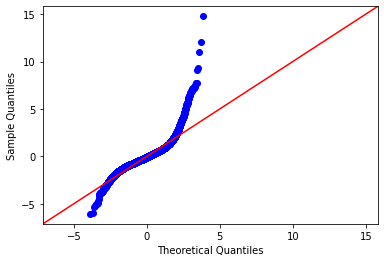

In [130]:
# a QQ plot to see if an S curve, therefore forms normal distribution
fig = sm.graphics.qqplot(model_4.resid, dist=stats.norm, line='45', fit=True)
fig.show()

### Interpretations of the fourth model
* The model is statistically significant as the p-value is below the standard alpha of 0.05
* Our model is of by slightly over 200,000 in regards of our metric the RMSE, which is lower compared to our other models
* The  accuracy (R-Squared) has increased from 49.6% to 68% to the model that includes all the variables
* The QQ plot shows that the distribution is not a perfect linear relationship

# Conclusion


The final model has an improved R-squared score of 0.600 and yields information that allows us to make useful inferences about the predicted sale price of a house, as well what actions a homeowner may take in order to increase it.

Square footage of the living space: Increasing the square footage is associated with a higher sale price. 

Condition of the house (maintenance): The reference point for the model is a house with a condition of "Average." For a condition of "Fair", we expect an increase in the price by 1758

Grade of the house (quality of construction): Higher grades are associated with higher sale prices. 

Waterfront and view: Houses that are on a waterfront and houses with nice views will tend to sell for higher than houses that don't have these features.

# Limitations

A major limitation of the regression models above is the R-squared (of 68%) is not exemplary, it only comes to show that 32% of the variation cannot be explained by the model. Although we can still make good inferences and deductions of the features that affect the price of the houses.

The square footage of living space had to be augmented to give a linear relationship with price.


The RMSE shows us by how much the models are off by, and shows that this analysis was not so much a good fit for the particular, even though some recommendations can be made.

# Recommendations

The analysis was doen to determine the features that will ensure increase in sales in the homes by the Selling Sunset agency 
* From the analysis, we see that increase in the square footage of living space, the house is expceted to sell for more.


* Some maintenance to improve the condition of the house to any higher classification, the expected sale price should go up.


* Higher grades(quality of construction and finishing) will ensure an increase in price of the home. The agency should invest in a quality design of the house by the quality of contractors during renovation, the landscaping and planning dring construction.


* Houses with beautiful views and a waterfront would sell faster. then the real estate agency should emphasize these in the listing, photos, and any other marketing for the home sale with these feaures.

